In [1]:
%store -r X_small y

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
X = X_small

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

# Set the device (GPU if available, else CPU)
device = torch.device("cuda" if torch.backends.mps.is_available() else "cpu")
print(device)

# Define the neural network architecture
class BirdClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BirdClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Define the hyperparameters
input_size = 50
hidden_size = 64
num_classes = 7
learning_rate = 0.001
batch_size = 128
num_epochs = 200

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.from_numpy(X_train).float().to(device)
X_test = torch.from_numpy(X_test).float().to(device)
y_train = torch.from_numpy(y_train).long().to(device)
y_test = torch.from_numpy(y_test).long().to(device)

# Create the DataLoader for training and test sets
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create an instance of the BirdClassifier model
model = BirdClassifier(input_size, hidden_size, num_classes).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
losses = []
accuracies = []

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        y_pred = []
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            y_pred.extend(predicted.cpu().numpy().tolist())
    
    acc = accuracy_score(y_test.cpu().numpy(), y_pred)
    losses.append(loss.item())
    accuracies.append(acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {acc:.4f}")

Epoch [1/200], Loss: 0.4978, Accuracy: 0.8389
Epoch [2/200], Loss: 2.6510, Accuracy: 0.8260
Epoch [3/200], Loss: 0.5809, Accuracy: 0.8715
Epoch [4/200], Loss: 0.4329, Accuracy: 0.8899
Epoch [5/200], Loss: 3.9476, Accuracy: 0.8743
Epoch [6/200], Loss: 0.2427, Accuracy: 0.8913
Epoch [7/200], Loss: 0.1377, Accuracy: 0.9092
Epoch [8/200], Loss: 0.3424, Accuracy: 0.9010
Epoch [9/200], Loss: 1.0770, Accuracy: 0.8978
Epoch [10/200], Loss: 1.7348, Accuracy: 0.9176
Epoch [11/200], Loss: 0.0571, Accuracy: 0.9150
Epoch [12/200], Loss: 0.3181, Accuracy: 0.8926
Epoch [13/200], Loss: 0.1841, Accuracy: 0.9196
Epoch [14/200], Loss: 0.6017, Accuracy: 0.9149
Epoch [15/200], Loss: 0.3752, Accuracy: 0.9227
Epoch [16/200], Loss: 0.1455, Accuracy: 0.9187
Epoch [17/200], Loss: 0.1926, Accuracy: 0.9297
Epoch [18/200], Loss: 0.2038, Accuracy: 0.9183
Epoch [19/200], Loss: 0.3832, Accuracy: 0.9288
Epoch [20/200], Loss: 0.3057, Accuracy: 0.9287
Epoch [21/200], Loss: 0.0692, Accuracy: 0.9308
Epoch [22/200], Loss: 

Epoch [174/200], Loss: 0.1186, Accuracy: 0.9485
Epoch [175/200], Loss: 0.1266, Accuracy: 0.9506
Epoch [176/200], Loss: 0.0564, Accuracy: 0.9541
Epoch [177/200], Loss: 0.0867, Accuracy: 0.9443
Epoch [178/200], Loss: 0.0506, Accuracy: 0.9535
Epoch [179/200], Loss: 0.3524, Accuracy: 0.9400
Epoch [180/200], Loss: 0.1948, Accuracy: 0.9477
Epoch [181/200], Loss: 0.3296, Accuracy: 0.9523
Epoch [182/200], Loss: 0.0659, Accuracy: 0.9511
Epoch [183/200], Loss: 0.1355, Accuracy: 0.9516
Epoch [184/200], Loss: 0.2102, Accuracy: 0.9532
Epoch [185/200], Loss: 0.1375, Accuracy: 0.9478
Epoch [186/200], Loss: 0.1316, Accuracy: 0.9525
Epoch [187/200], Loss: 0.0652, Accuracy: 0.9498
Epoch [188/200], Loss: 0.0370, Accuracy: 0.9514
Epoch [189/200], Loss: 0.0335, Accuracy: 0.9516
Epoch [190/200], Loss: 0.0967, Accuracy: 0.9506
Epoch [191/200], Loss: 0.0532, Accuracy: 0.9505
Epoch [192/200], Loss: 0.1637, Accuracy: 0.9444
Epoch [193/200], Loss: 0.0599, Accuracy: 0.9508
Epoch [194/200], Loss: 0.3327, Accuracy:

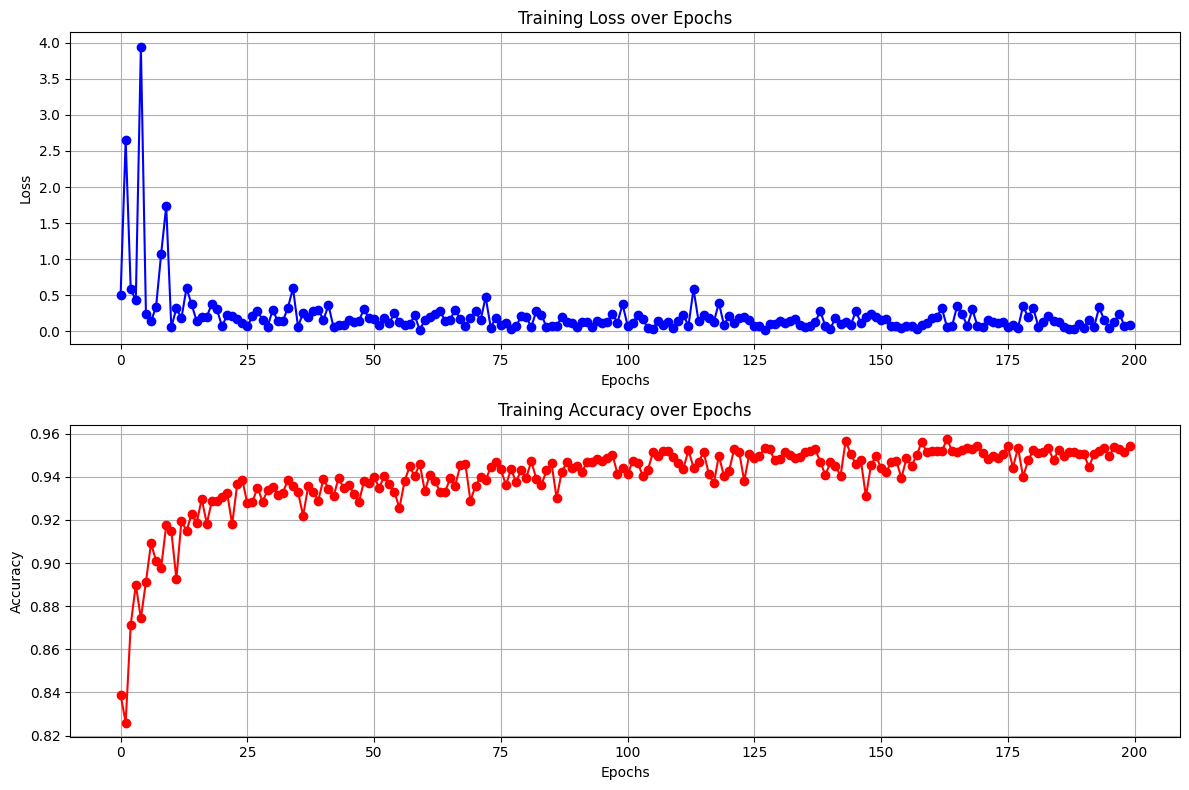

In [4]:
import matplotlib.pyplot as plt

epochs = range(num_epochs)

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))

# Plotting loss
ax1.plot(epochs, losses, color='blue', marker='o')
ax1.set_title('Training Loss over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid(True)

# Plotting accuracy
ax2.plot(epochs, accuracies, color='red', marker='o')
ax2.set_title('Training Accuracy over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid(True)

# Adjusting the layout and showing the plots
plt.tight_layout()
plt.show()
